# Importing Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [ ]:
# Load the Dataset
url = url = 'https://raw.githubusercontent.com/Leonard-Simala/Datasets/refs/heads/main/UCI_Credit_Card.csv'
data = pd.read_csv(url)


## Dataset Description

In [ ]:
# Display basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#First Few Rows of the Dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory Data Analysis
### Univariate Analysis

Summary statistics for AGE:

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


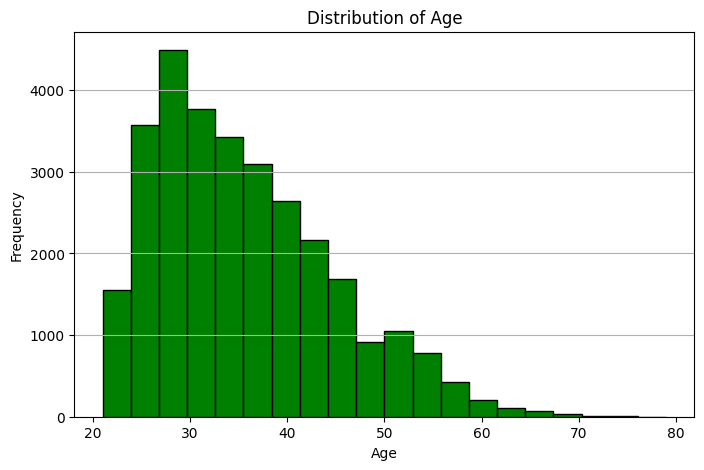

In [ ]:
# Numerical Attribute: Age
print("Summary statistics for AGE:\n")
print(data['AGE'].describe())

# Plot: Distribution of Age
plt.figure(figsize=(8, 5))
data['AGE'].plot(kind='hist', bins=20, color='green', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


Summary statistics for LIMIT_BAL:

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


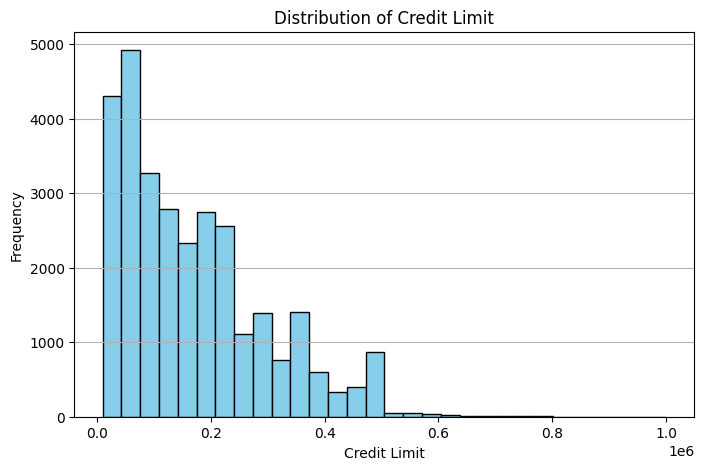

In [ ]:
# Numerical Attribute: Credit Limit
print("Summary statistics for LIMIT_BAL:\n")
print(data['LIMIT_BAL'].describe())

# Plot: Distribution of Credit Limit
plt.figure(figsize=(8, 5))
data['LIMIT_BAL'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


Value Counts for EDUCATION:

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


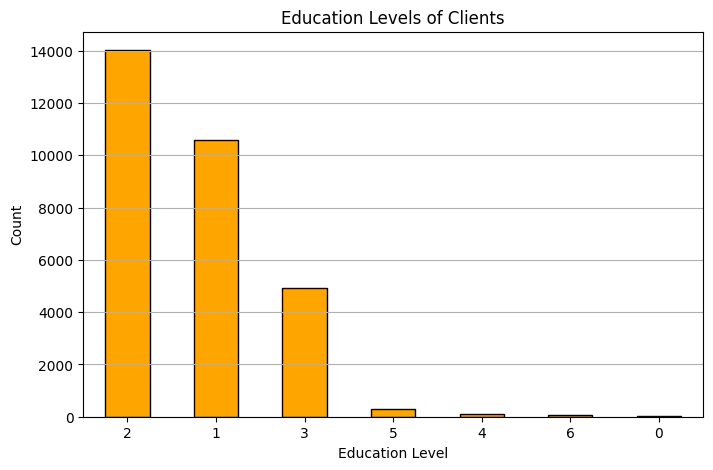

In [ ]:
# Categorical Attribute: Education
print("\nValue Counts for EDUCATION:\n")
print(data['EDUCATION'].value_counts())

# Plot: Education Levels
plt.figure(figsize=(8, 5))
data['EDUCATION'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Education Levels of Clients')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


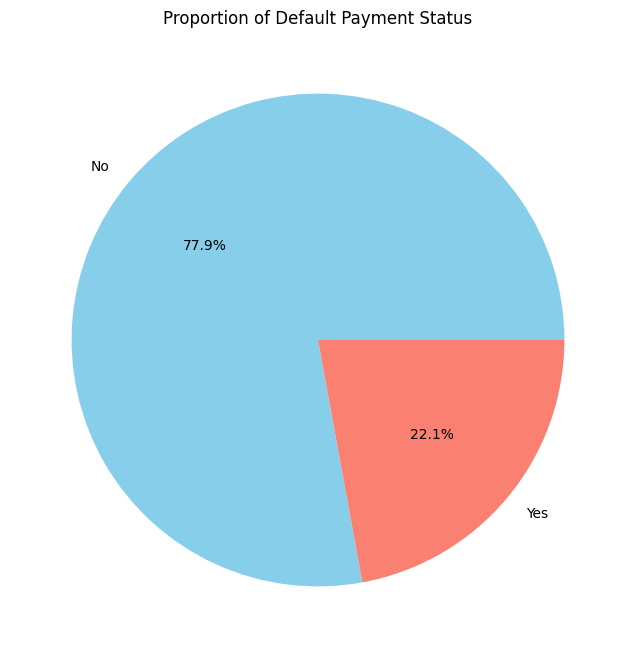

In [ ]:
# Plot: Default Payment Status
plt.figure(figsize=(8, 8))
data['default.payment.next.month'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['No', 'Yes'])
plt.title('Proportion of Default Payment Status')
plt.ylabel('')
plt.show()

### Bivariate Analysis

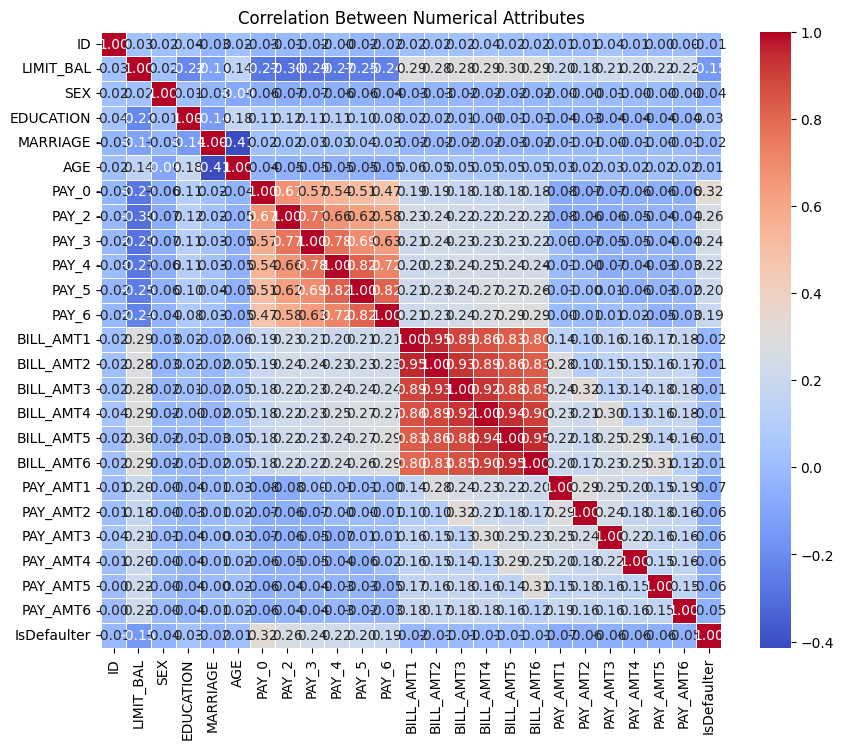

In [ ]:
#Renaming for convinience
data['IsDefaulter'] = data ['default.payment.next.month']
data.drop('default.payment.next.month',axis = 1,inplace=True)

# Numerical vs. Numerical: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Attributes')
plt.show()



Correlation between LIMIT_BAL and AGE:

           LIMIT_BAL       AGE
LIMIT_BAL   1.000000  0.144713
AGE         0.144713  1.000000


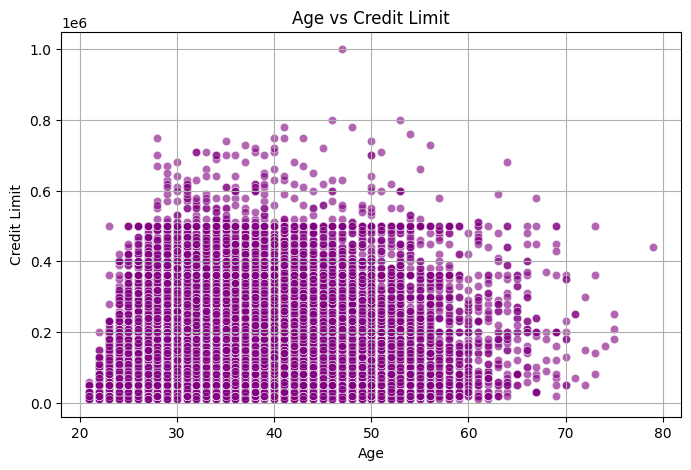

In [ ]:
# Observing specific relationships from the correlation matrix
print("\nCorrelation between LIMIT_BAL and AGE:\n")
print(data[['LIMIT_BAL', 'AGE']].corr())

# Scatter Plot: Age vs Credit Limit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AGE', y='LIMIT_BAL', data=data, alpha=0.6, color='purple')
plt.title('Age vs Credit Limit')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.grid()
plt.show()

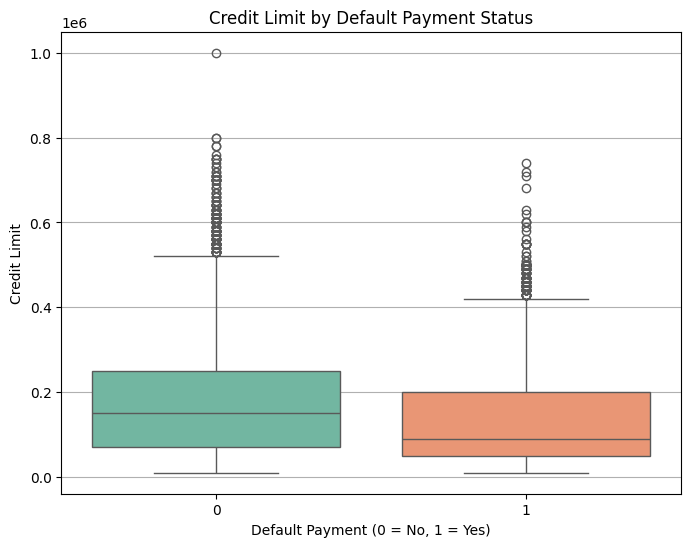

In [ ]:
# Categorical vs. Numerical: Boxplot (Default Payment vs Credit Limit)
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsDefaulter', y='LIMIT_BAL', hue='IsDefaulter', data=data, palette='Set2', dodge=False)
plt.title('Credit Limit by Default Payment Status')
plt.xlabel('Default Payment (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.grid(axis='y')
plt.legend([],[], frameon=False)  # Hide the legend since `hue` is redundant here
plt.show()


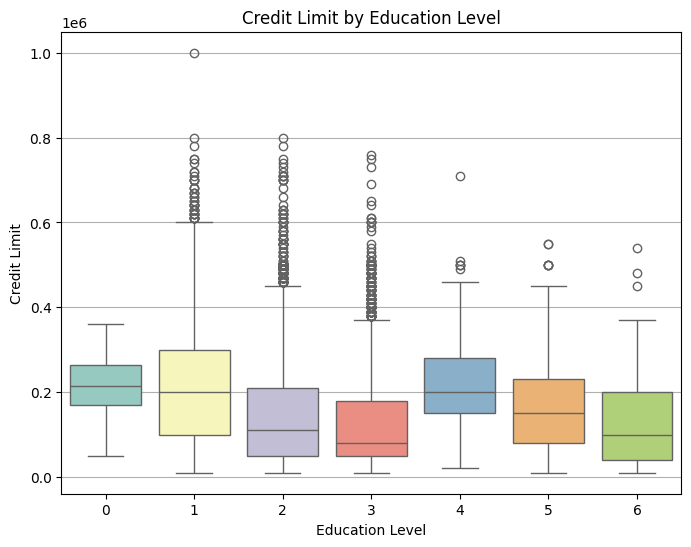

In [ ]:
# Observing the impact of Education on Credit Limit
plt.figure(figsize=(8, 6))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='EDUCATION', data=data, palette='Set3', dodge=False)
plt.title('Credit Limit by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Limit')
plt.grid(axis='y')
plt.legend([],[], frameon=False)  # Hide the legend since `hue` adds no new information
plt.show()



Education Level vs Default Payment Crosstab:

IsDefaulter      0     1
EDUCATION               
0               14     0
1             8549  2036
2            10700  3330
3             3680  1237
4              116     7
5              262    18
6               43     8


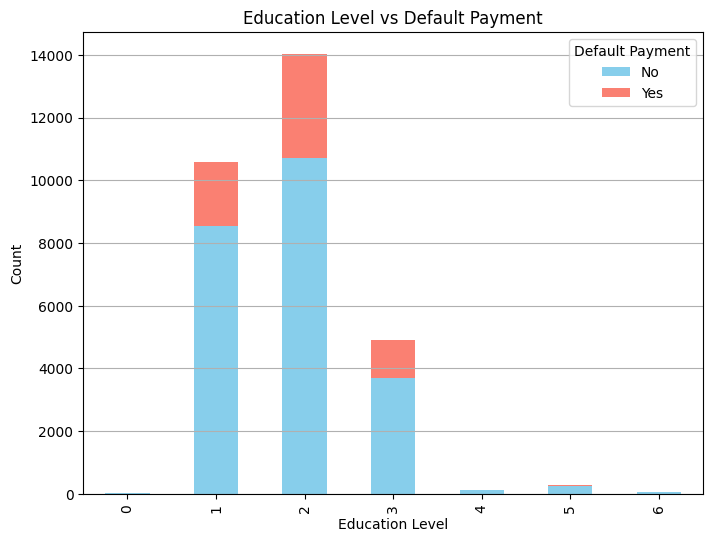

In [ ]:
# Categorical vs. Categorical: Crosstab (Education vs Default Payment)
print("\nEducation Level vs Default Payment Crosstab:\n")
edu_default = pd.crosstab(data['EDUCATION'], data['IsDefaulter'])
print(edu_default)

# Plot: Education vs Default Payment
edu_default.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Education Level vs Default Payment')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()

## Impact of Age Groups on Default Payment

In [ ]:
# Example: Drop rows with missing categorical data
missing_categories = ['EDUCATION']  # Adjust based on actual dataset
for category in missing_categories:
    if data[category].isnull().sum() > 0:
        data.dropna(subset=[category], inplace=True)
        print(f"Dropped rows with missing values in {category}.")


In [ ]:
# Creating Age Groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)


Age Group vs Default Payment Crosstab:

IsDefaulter     0     1
AgeGroup               
20-29        7421  2197
30-39        8962  2276
40-49        4979  1485
50-59        1759   582
60-69         225    89


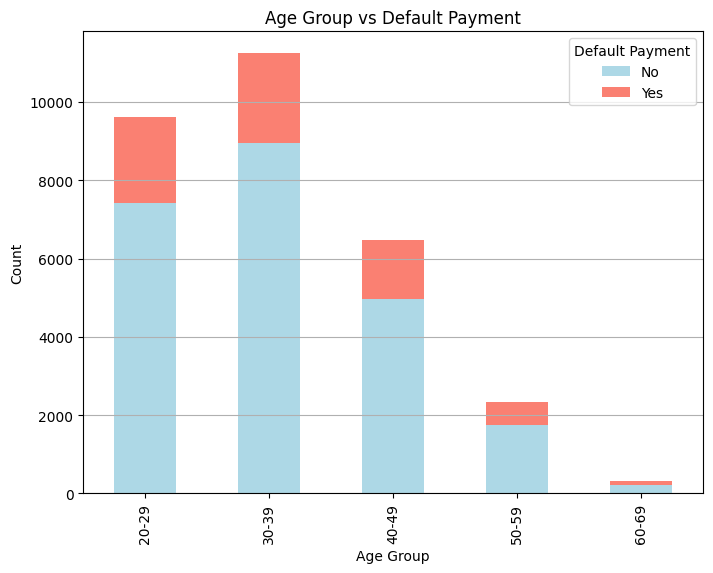

In [ ]:
# Crosstab for Age Group and Default Payment
print("\nAge Group vs Default Payment Crosstab:\n")
age_default = pd.crosstab(data['AgeGroup'], data['IsDefaulter'])
print(age_default)

# Plot: Age Group vs Default Payment
age_default.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
plt.title('Age Group vs Default Payment')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()

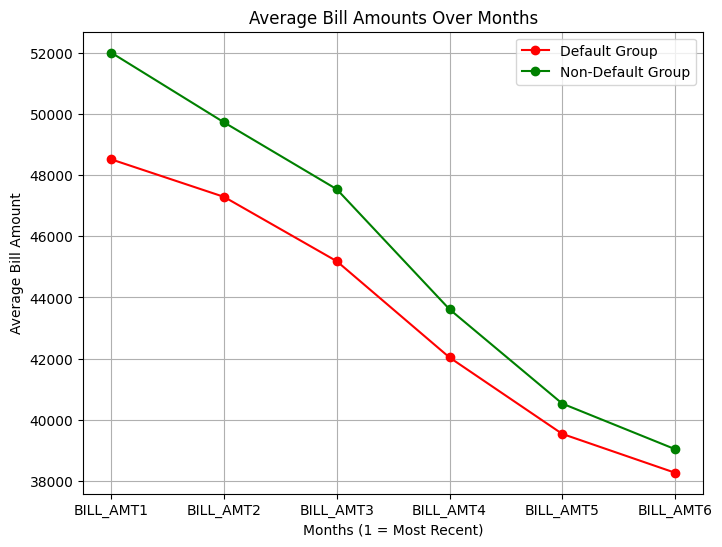

In [ ]:
# Observing Bill Amounts Over Months for Default/Non-Default Groups
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Average Bill Amounts
default_group = data[data['IsDefaulter'] == 1][bill_columns].mean()
non_default_group = data[data['IsDefaulter'] == 0][bill_columns].mean()

# Line Plot: Bill Amounts
plt.figure(figsize=(8, 6))
plt.plot(bill_columns, default_group, label='Default Group', marker='o', color='red')
plt.plot(bill_columns, non_default_group, label='Non-Default Group', marker='o', color='green')
plt.title('Average Bill Amounts Over Months')
plt.xlabel('Months (1 = Most Recent)')
plt.ylabel('Average Bill Amount')
plt.legend()
plt.grid()
plt.show()

### Handling Missing Data

In [ ]:
print("\nHandling Missing Data\n")

# Check for missing values
print("Missing Values in Dataset:\n")
print(data.isnull().sum())

#Fill missing numerical data with mean
if data['LIMIT_BAL'].isnull().sum() > 0:
    data['LIMIT_BAL'].fillna(data['LIMIT_BAL'].mean(), inplace=True)
    print("Filled missing values in LIMIT_BAL with mean.")

#Drop rows with missing categorical data
missing_categories = ['EDUCATION']  # Adjust based on actual dataset
for category in missing_categories:
    if data[category].isnull().sum() > 0:
        data.dropna(subset=[category], inplace=True)
        print(f"Dropped rows with missing values in {category}.")


Handling Missing Data

Missing Values in Dataset:

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
IsDefaulter     0
AgeGroup       25
dtype: int64




##Univariate Analysis

####Distribution of Age:
 The histogram shows that the age of credit card clients is mostly distributed between 25 and 40 years old, a slightly right-skewed distribution, which is typical for credit card user demographics. Younger adults are more likely to adopt credit cards and credit card usage tends to decline with age.

####Distribution of Credit Limit:
The histogram reveals that most clients have a credit limit below 500,000. There's a right skew, indicating some clients with higher credit limits.
This distribution is expected since Financial institutions often provide lower credit limits to younger individuals or those with shorter credit histories. As individuals establish a positive credit history and demonstrate financial stability, they are likely to receive higher credit limits.

####Education Levels:
The bar chart illustrates the education level distribution of the clients. Most clients hold university or graduate school degrees.
Proportion of Default Payment Status: The pie chart indicates that the majority of credit card clients did not default on their payments next month.The higher proportion of university and graduate school degree holders among credit card clients aligns with the target market of credit card companies. Individuals with higher education levels are often perceived as having greater financial stability and are therefore more likely to be approved for credit cards.

###Proportion of Default Payment Status:
The lower default rate is a positive sign for the credit card issuer and reflects the effectiveness of their risk assessment and credit approval processes. However, it's crucial to monitor this metric continuously as economic conditions and consumer behavior can change over time.

##Bivariate Analysis

####Correlation Between Numerical Attributes:
The weak correlation between credit limit and age suggests that while age plays a role in credit limit allocation, other factors like income, employment history and credit score likely have a greater impact. The negative correlation between payments and bill amounts is expected since paying more on a bill would reduce the next month's bill amount.

####Age vs Credit Limit:
The weak correlation between age and credit limit is visualized in the scatter plot. Although there's a slight upward trend, it's not very pronounced, implying that credit limits are not solely determined by age.

####Credit Limit by Default Payment Status:
Lower credit limits for defaulters indicate that credit risk assessment models are likely effective in assigning lower limits to individuals deemed riskier. This helps to mitigate potential losses for the credit card issuer.

####Credit Limit by Education Level:
The higher credit limits for clients with graduate degrees likely reflect higher earning potential and greater financial stability associated with advanced education. Credit card companies view this demographic as less risky.

####Education Level vs Default Payment:
Analyzing default rates across education levels can help credit card companies refine their risk assessment models. Education may be an indirect indicator of financial literacy or job security, factors that influence default risk.

##Age Group vs Default Payment:
Observing default rates across different age groups allows for more targeted risk management strategies. Younger individuals might need more education and support to manage credit responsibly, while older clients might have different financial circumstances affecting their payment behavior.

####Average Bill Amounts Over Months:
Tracking bill amount trends for default and non-default groups helps in predicting future payment behavior and identifying potential early warning signs of default. Understanding these patterns is crucial for proactive risk mitigation.
